# Lab_5_FMNIST

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

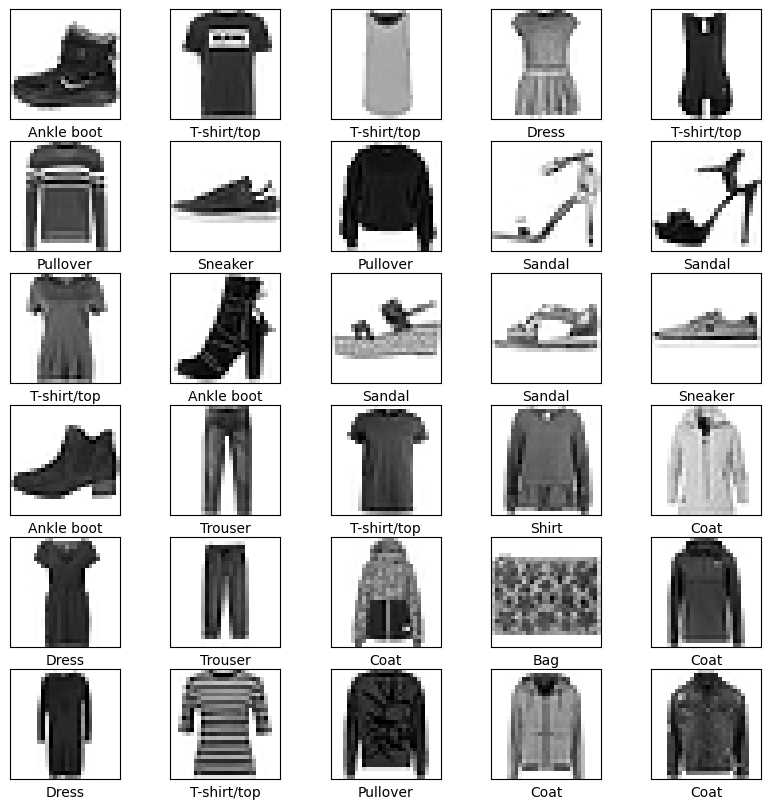

In [4]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(class_names[y_train[i]])
plt.show()

### Prepare data

In [5]:
import numpy as np

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [10]:
X_train = np.reshape(X_train, (-1, 28, 28, 1))
X_test = np.reshape(X_test, (-1, 28, 28, 1))

In [11]:
from keras.utils import to_categorical

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Building model

In [13]:
from keras import models
from keras.layers import BatchNormalization, Conv2D,Reshape, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

In [14]:
network = models.Sequential()

network.add(Conv2D(28, (3, 3), padding='same', activation='relu'))
network.add(Conv2D(28, (3, 3), padding='same', activation='relu'))
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.25))

network.add(Conv2D(56, (3, 3), padding='same', activation='relu'))
network.add(Conv2D(56, (3, 3), padding='same', activation='relu'))
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.25))

network.add(Flatten())

network.add(Dense(512, activation='relu'))
network.add(Dropout(0.5))
network.add(Dense(10, activation='softmax'))


In [15]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Train model

In [17]:
network.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
400/469 [========================>.....] - ETA: 14s - loss: 0.4119 - accuracy: 0.8483

KeyboardInterrupt: 

In [ ]:
network.save('fashion_model.h5')

## Test Model

In [24]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

images = ['sneakers.png', 'sandal.png', 'tshirt.jpg',
          'dress.png', 'bag.jpg', 'trousers.png']

model = load_model('fashion_model.h5')

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.1986 - accuracy: 0.9311


[0.19855330884456635, 0.9311000108718872]

In [28]:
test_images = []

for img in images:
    test_img = 255 - cv2.imread("resources/fashion/" + str(img))
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    test_img = cv2.resize(test_img, (28, 28))
    test_img = test_img.astype('float32') / 255

    test_img = np.reshape(test_img, (28, 28, 1))
    test_images.append(test_img)

preds = model.predict(np.array(test_images))

1/1 [==============================] - 0s 153ms/step


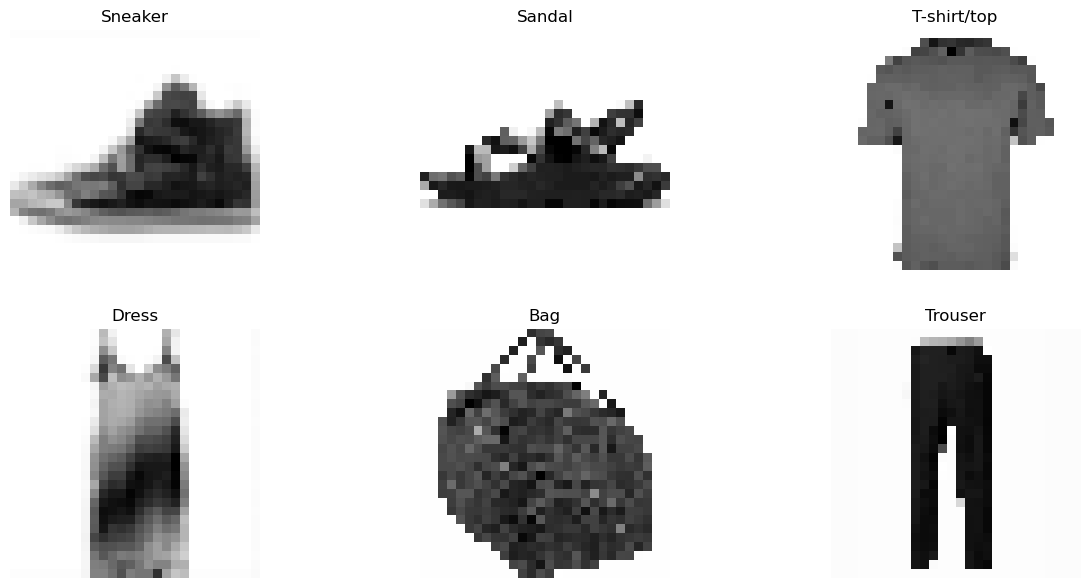

In [29]:
fig, axs = plt.subplots(len(images)//3 + 1, 3, figsize=(15, 5*len(images)//3 + 1))

for i in range(len(images)):
    row, col = i // 3, i % 3
    axs[row, col].imshow(test_images[i], cmap='binary')
    axs[row, col].axis('off')
    axs[row, col].set_title(class_names[np.argmax(preds[i])])

for i in range(len(images), (len(images)//3 + 1)*3):
    row = i // 3
    col = i % 3
    axs[row, col].remove()